In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install unrar

In [3]:
!unrar x amz_uk_price_prediction_dataset.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from amz_uk_price_prediction_dataset.rar

Extracting  amz_uk_price_prediction_dataset.csv                            4%  9% 13% 18% 22% 27% 32% 36% 41% 45% 50% 55% 59% 64% 68% 73% 78% 82% 87% 91% 96%100%  OK 
All OK


In [4]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [5]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [13]:
#Crosstab Analysis:
#Create a crosstab between the product category and the isBestSeller status.
#Are there categories where being a best-seller is more prevalent?
#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this
#proportion in descending order.

table_crosstab = (
    pd.crosstab(df['category'], df['isBestSeller'], normalize=True).sort_values(by=True, ascending=False)
)

table_counts = pd.crosstab(df['category'], df['isBestSeller'])

table_crosstab, table_counts

(isBestSeller                    False     True 
 category                                       
 Grocery                      0.003686  0.000228
 Health & Personal Care       0.003690  0.000226
 Baby                         0.006019  0.000140
 Sports & Outdoors            0.342084  0.000135
 Power & Hand Tools           0.003418  0.000125
 ...                               ...       ...
 Blank Media Cases & Wallets  0.000099  0.000000
 Boating Footwear             0.000057  0.000000
 Boxes & Organisers           0.000373  0.000000
 CD, Disc & Tape Players      0.003600  0.000000
 eBook Readers & Accessories  0.000101  0.000000
 
 [296 rows x 2 columns],
 isBestSeller                    False  True 
 category                                    
 3D Printers                       247      1
 3D Printing & Scanning           4065      2
 Abrasive & Finishing Products     245      5
 Action Cameras                   1696      1
 Adapters                          251      3
 ...          

In [11]:
#Statistical Tests:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats import chi2_contingency
chi_2 = chi2_contingency(table_crosstab[])
chi_2

Chi2ContingencyResult(statistic=np.float64(0.014953118387451341), pvalue=np.float64(1.0), dof=295, expected_freq=array([[3.90103487e-03, 1.27809783e-05],
       [3.90307430e-03, 1.27876601e-05],
       [6.13870501e-03, 2.01122672e-05],
       [3.41101937e-01, 1.11755383e-03],
       [3.53189679e-03, 1.15715696e-05],
       [7.87712101e-03, 2.58078475e-05],
       [3.84923317e-03, 1.26112602e-05],
       [3.89491655e-03, 1.27609329e-05],
       [7.24897445e-03, 2.37498480e-05],
       [7.10417443e-03, 2.32754391e-05],
       [2.51462567e-03, 8.23867956e-06],
       [3.90307430e-03, 1.27876601e-05],
       [3.49559481e-03, 1.14526332e-05],
       [3.21578407e-03, 1.05358880e-05],
       [3.31612437e-03, 1.08646334e-05],
       [3.74359034e-03, 1.22651421e-05],
       [2.97839362e-03, 9.75812460e-06],
       [3.47927932e-03, 1.13991787e-05],
       [3.82639148e-03, 1.25364238e-05],
       [7.39989278e-03, 2.42443024e-05],
       [3.82720725e-03, 1.25390966e-05],
       [4.80858428e-03, 1.

In [14]:
from scipy.stats.contingency import association
cramer_test = association(table_counts, method='cramer')
cramer_test

0.1222829439760564

<Axes: xlabel='category'>

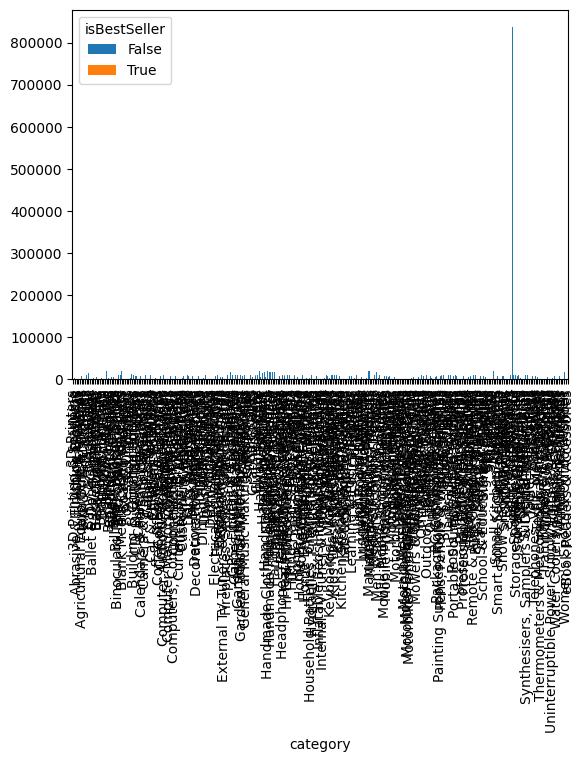

In [15]:
#Visualizations:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

table_counts.plot(kind='bar', stacked=True)

In [16]:
#Preliminary Step: Remove outliers in product prices.
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR
#or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be
#done with the dataframe without outliers.
#Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.


# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_whiskers = Q1 - 1.5 * IQR
upper_whiskers = Q3 + 1.5 * IQR

# Remove outliers
df_prices_nooutliers = df[(df['price'] >= lower_whiskers) & (df['price'] <= upper_whiskers)]


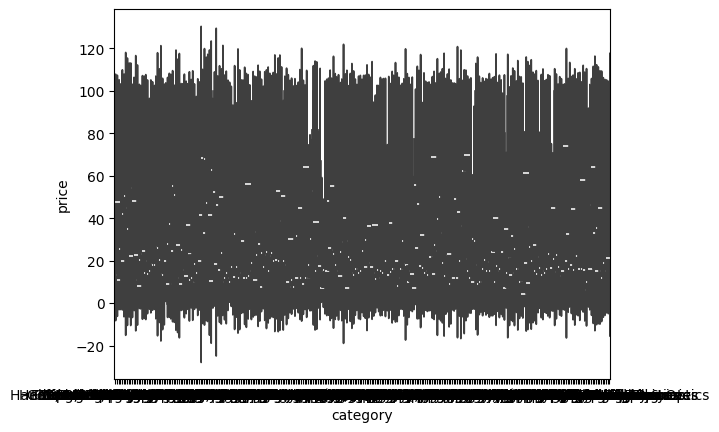

In [17]:
#Violin Plots:
#Use a violin plot to visualize the distribution of price across different product categories.
#Filter out the top 20 categories based on count for better visualization.
#Which product category tends to have the highest median price? Don't filter here by top categories.

sns.violinplot(data=df_prices_nooutliers, x='category', y='price')
plt.show()

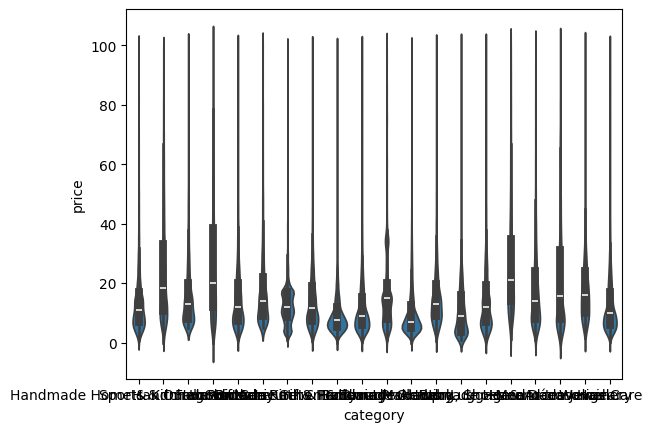

In [23]:
nooutliers_20 = df_prices_nooutliers['category'].value_counts().head(20).index
df_top20 = df_prices_nooutliers[df_prices_nooutliers['category'].isin(nooutliers_20)]



sns.violinplot(data=df_top20, x='category', y='price')
plt.show()

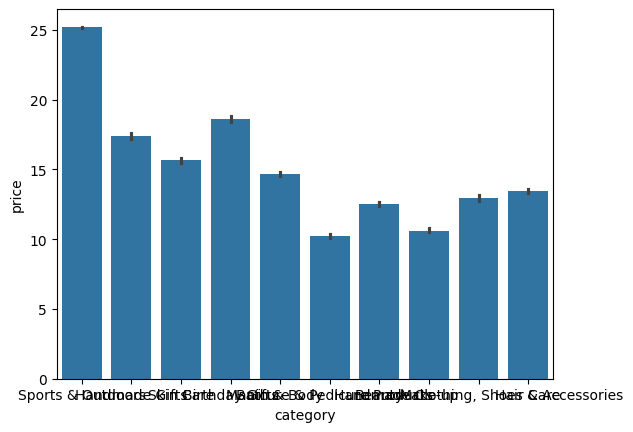

In [24]:
#Bar Charts:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#Which product category commands the highest average price? Don't filter here by top categories.

categories_10 = df_prices_nooutliers['category'].value_counts().head(10).index
df_top10 = df_prices_nooutliers[df_prices_nooutliers['category'].isin(categories_10)]

sns.barplot(data=df_top10, x='category', y='price')
plt.show()

<Axes: xlabel='category', ylabel='stars'>

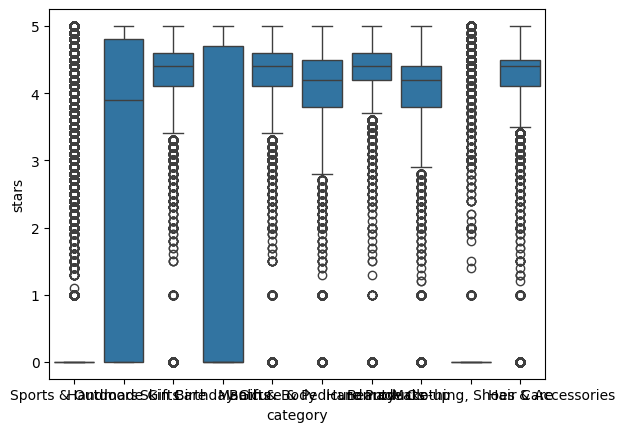

In [25]:
#Box Plots:
#Visualize the distribution of product ratings based on their category using side-by-side box plots.
#Filter out the top 10 categories based on count for better visualization.
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

sns.boxplot(data=df_top10, x="category", y="stars")

In [26]:
#Correlation Coefficients:
#Calculate the correlation coefficient between price and stars.
#Is there a significant correlation between product price and its rating?

df_prices_nooutliers["price"].corr(df_prices_nooutliers["stars"])

np.float64(-0.07767299878181352)

In [27]:
df_prices_nooutliers["price"].corr(df_prices_nooutliers["stars"], method="spearman")

np.float64(-0.06679697280768393)

<Axes: xlabel='price', ylabel='stars'>

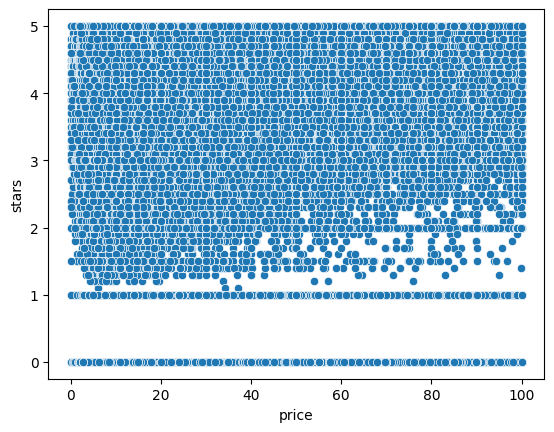

In [28]:
#Visualizations:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#Use a correlation heatmap to visualize correlations between all numerical variables.
#Examine if product prices typically follow a normal distribution using a QQ plot.

sns.scatterplot(data=df_prices_nooutliers, x="price", y="stars")

<Axes: >

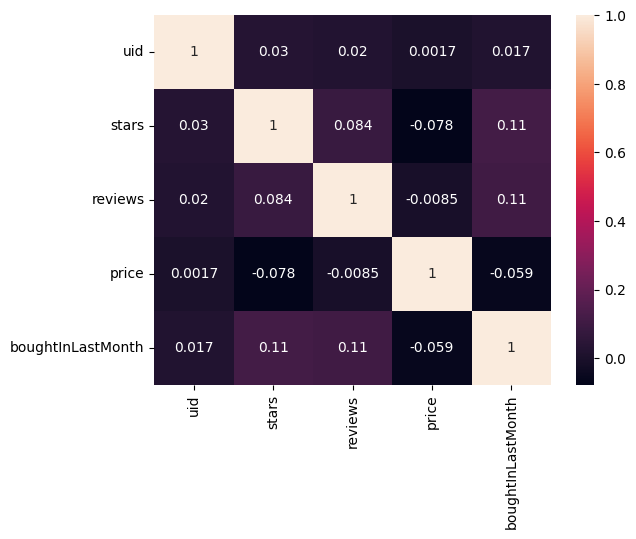

In [30]:
df_numerical = df_prices_nooutliers.select_dtypes("number")

sns.heatmap(df_numerical.corr(), annot=True)

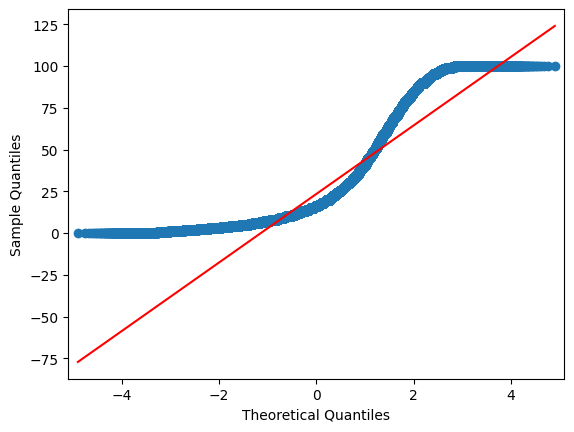

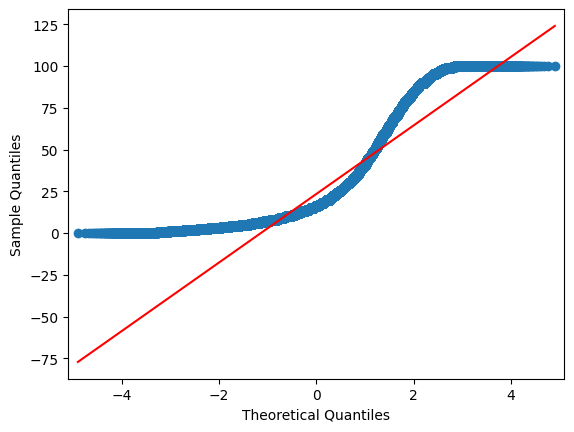

In [32]:
import statsmodels.api as sm
sm.qqplot(df_prices_nooutliers["price"], line="s")